## Données USPS
Cas initial en 2D

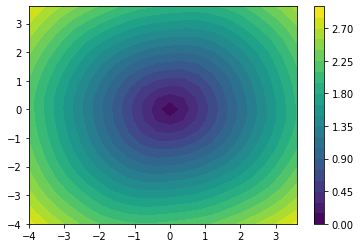

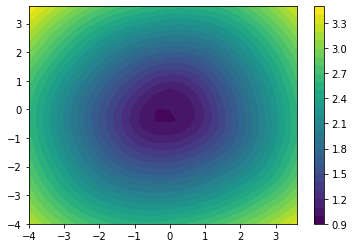

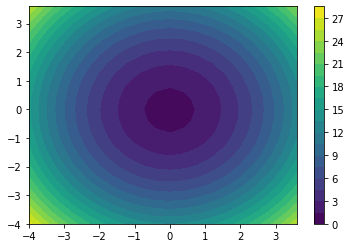

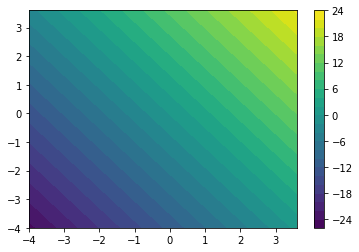

In [63]:
import tme3_etu as tp3
import importlib
importlib.reload(tp3)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
import arftools

iris = datasets.load_iris()
boston = datasets.load_boston()

iris_x = iris.data
iris_y = iris.target

boston_x = boston.data[:,0::]
boston_y = boston.target

trainx, trainy = arftools.gen_arti(nbex = 100, data_type = 1, epsilon = 1)

tp3.plot_error(trainx,trainy,tp3.hinge)
tp3.plot_error(trainx,trainy,tp3.hinge_g)
tp3.plot_error(trainx,trainy,tp3.mse)
tp3.plot_error(trainx,trainy,tp3.mse_g)

#tp3.plot_error(boston_x,boston_y,tp3.hinge_g)



Comparaison entre 6 et 9

C:\Users\clems\anaconda3\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\clems\OneDrive\Documents\GitHub\ML_DAC\TP3\tme3_etu.py:105: RuntimeWarning: invalid value encountered in sign
  return np.sign(datax.dot(self.w.T))
C:\Users\clems\OneDrive\Documents\GitHub\ML_DAC\TP3\tme3_etu.py:117: RuntimeWarning: invalid value encountered in greater_equal
  return ((self.predict(datax) * datay) >= 0).mean()


Erreur : train 0.000000, test 0.000000
[[0.50764526 0.48991354]
 [0.50764526 0.48991354]
 [0.50764526 0.48991354]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


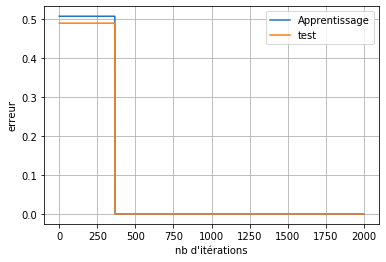

In [123]:
import tme3_etu as tp3
import importlib
importlib.reload(tp3)

import arftools
import numpy as np
import matplotlib.pyplot as plt

train_datax, train_datay = tp3.load_usps("USPS_train.txt")    
test_datax, test_datay = tp3.load_usps("USPS_test.txt")

valplus = 9
valminus = 6

train_x = train_datax[np.logical_or(train_datay == valplus, train_datay == valminus), :]  

train_y = train_datay[np.logical_or(train_datay == valplus, train_datay == valminus)]
train_y = np.where(train_y == valplus, 1, -1)

test_x = test_datax[np.logical_or(test_datay == valplus, test_datay == valminus), :]  

test_y = test_datay[np.logical_or(test_datay == valplus, test_datay == valminus)]
test_y = np.where(test_y == valplus, 1, -1)

perceptron = tp3.Lineaire(loss = tp3.hinge, loss_g = tp3.hinge_g, max_iter=2000, eps=0.1, hist = True, bias =False)
#perceptron.fit(train_x, train_y)
erreurs = perceptron.fit(train_x, train_y, test_x, test_y)
print("Erreur : train %f, test %f"% (perceptron.accuracy(train_x,train_y),perceptron.accuracy(test_x,test_y)))
#tp3.show_usps(perceptron.w[:])


erreurs = perceptron.fit(train_x, train_y, testx = test_x, testy = test_y)
fig, ax = plt.subplots()
ax.plot(erreurs[:, 0], label = "Apprentissage")
ax.plot(erreurs[:, 1], label = "test")
print(erreurs)
ax.legend()
ax.set_xlabel("nb d'itérations")
ax.set_ylabel("erreur")
ax.grid(True)
ax.set_axisbelow(True)
